In [444]:
import os
from PIL import Image
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import sift

In [263]:
im = Image.open('climbing_1_small.jpg').convert('L')
im.save('tmp.pgm')

In [439]:
imagename = "tmp.pgm"
cmmd = str("$HOME/bin/vlfeat-0.9.20/bin/glnxa64/mser --min-area=0.0001 --max-area=0.001 --frames=tmp.frame "+imagename)
os.system(cmmd)

0

In [432]:
def plot_features(im, f):
    
    def draw_ellipse(c, w, h, ang):
        t = arange(0, 1.01, .01)*2*pi
        x = w*cos(t)
        y = h*sin(t)
        x2 = x*cos(ang)-y*sin(ang)+c[0]
        y2 = x*sin(ang)+y*cos(ang)+c[1]
        plot(x2, y2, 'b', linewidth=2)
    
    imshow(im)
    norm = sqrt(im.width*im.height)
    for g in f:
        [x, y, s11, s12, s22] = g
        a = array([[s11, s12], [s12, s22]])
        e, v = np.linalg.eig(a)
        w = sqrt(e[0])*2
        h = sqrt(e[1])*2
        ang = math.atan2(v[1][0], v[0][0])
        draw_ellipse([x, y], w, h, ang)
    axis('off')

In [498]:
f = loadtxt("tmp.frame")
print len(f)

235


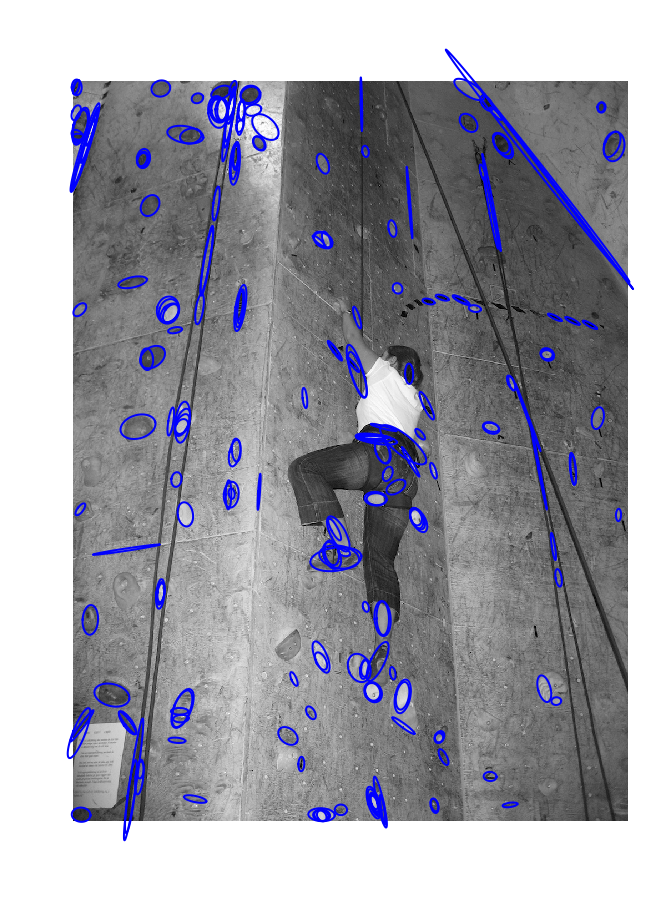

In [462]:
figure(figsize=(16,16))
gray()
plot_features(im, f)
show()

In [477]:
def process_image_mser(imagename, resultname, params="--read-frames=mser.frame"):
    """ Process an image and save the results in a file. """

    if imagename[-3:] != 'pgm':
        # create a pgm file
        im = Image.open(imagename).convert('L')
        im.save('tmp.pgm')
        imagename = 'tmp.pgm'
    
    cmmd = str("$HOME/bin/vlfeat-0.9.20/bin/glnxa64/sift "+imagename+" --output="+resultname+" "+params)
    os.system(cmmd)
    print 'processed', imagename, 'to', resultname


In [531]:
## The MAN page of VLfeat MSER says frame is [x, y, a11, a12, a21, a22]
## But, this does not seem right
## Probably it is [x, y, size, angle]
## see this page http://www.vlfeat.org/overview/sift.html

ffff = []
for g in f:
    [x, y, s11, s12, s22] = g
    a = array([[s11, s12], [s12, s22]])
    e, v = np.linalg.eig(a)
    idx = e.argsort()[::-1]
    w = sqrt(e[0])*2
#    h = sqrt(e[1])*2
    ang = math.atan2(v[1][0], v[0][0])
#    ffff.append([x, y, w*cos(ang), w*sin(ang), -h*sin(ang), h*cos(ang)])  
    ffff.append([x, y, w, ang])  

savetxt("mser.frame", ffff, fmt='%4.4f', delimiter=' ')

processed tmp.pgm to tmp.sift


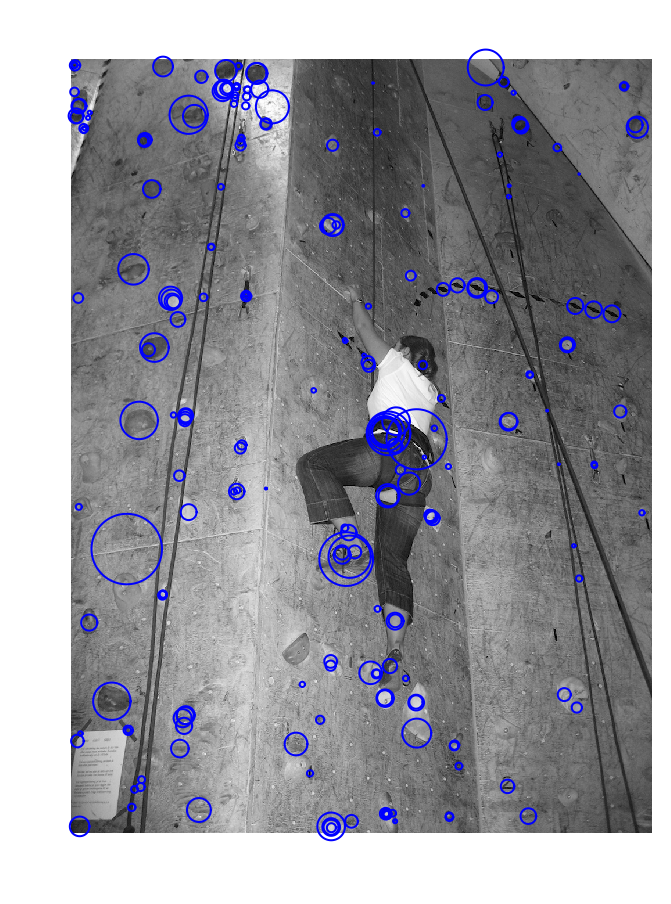

In [536]:
process_image_mser("tmp.pgm", "tmp.sift")
l1,d1 = sift.read_features_from_file('tmp.sift')

figure(figsize=(16, 16))
gray()
sift.plot_features(im,l1,circle=True)
show()